# Tuning Hyper-Parameters with Grid Search

In the previous notebook, the optimal hyper-parameter *n_neighbors* passed to the k-nearest neighbors estimator was found by performing cross-validated iterations through various values of *n_neighbors*.

In fact, scikit-learn library provides a utility function to search through a grid of parameters employing k-fold cross-validation. More than one hyper-parameter can be tuned simultaneously using this function. This notebook demonstrates this method to find optimal knn hyper-parameters using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

# load features and targets into X and y variables, respectively
iris = load_iris()
X = iris.data
y = iris.target

# perform grid-search on two parameters, n_neighbors and weights.
n_neighbor_values = list(range(1, 31))
weight_values = ['distance', 'uniform']

# parameter grid search expects a dictionary of parameter names and values
param_grid = dict(n_neighbors=n_neighbor_values, weights=weight_values)

print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['distance', 'uniform']}


In [75]:
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=10)
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [76]:
# print the best estimator along with the score
print("The best parameters are {} with a mean score of {:.2f}".format(grid.best_params_, grid.best_score_))

The best parameters are {'n_neighbors': 13, 'weights': 'uniform'} with a mean score of 0.98


Plot the mean scores achieved by the parameters *n_neighbors* and *weights* 

In [77]:
scores = grid.cv_results_['mean_test_score'].reshape(len(n_neighbor_values), len(weight_values))

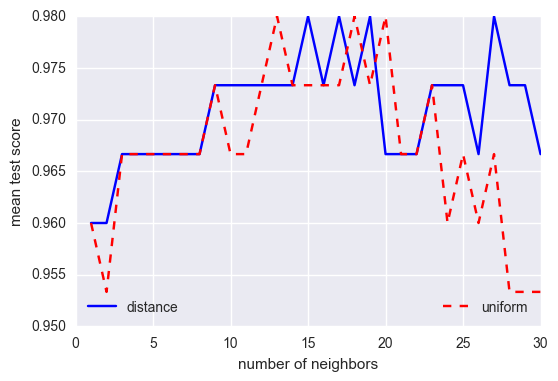

In [78]:
line_distance, = plt.plot(n_neighbor_values, scores[:,0], 'b-', label='distance')
line_uniform, = plt.plot(n_neighbor_values, scores[:,1], 'r--', label='uniform')

# legends
legend_distance = plt.legend(handles=[line_distance], loc=3)

# manually add the legend to the current axes
ax = plt.gca().add_artist(legend_distance)

legend_weights = plt.legend(handles=[line_uniform], loc=4)

plt.xlabel("number of neighbors")
plt.ylabel("mean test score")

Now that the optimal values of the parameters *n_neighbors* and *weight* are known, the knn estimor could be trained on the complete dataset by passing those parameter values. However, GridSearchCV does this automatically. All that remains is to make predictions on new observations.

In [80]:
print(grid.predict([[5.2, 3.6, 1.3, 0.3]]))

[0]
